### Name: TJ Dunne
### Number: 16143892

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data from bank.csv to pandas Dataframe
bank_df = pd.read_csv('bank.csv')

## Introduction	
From reading the information provided for the Bank Marketing Dataset, I saw this was a sample dataset with information related to a direct marketing campaign of a Portuguese banking institution. Each row in the dataset represents a customer, and the columns represent various features related to them, such as age, job, marital status, education, default status, balance, etc. The target variable "subscribed" indicates whether the customer subscribed to a term deposit after the marketing campaign. The meaning of each column is outlined below and was taken from the Bank Marketing dataset description



### bank client data:
1. **age** (numeric)
2. **job :** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. **marital :** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. **education:** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. **default:** has credit in default? (categorical: 'no','yes','unknown')
6. **balance:** (numeric) Balance in account
7. **housing:** has housing loan? (categorical: 'no','yes','unknown')
8. **loan:** has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
9. **contact:** contact communication type (categorical: 'cellular','telephone')
10. **day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
13. **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. **previous:** number of contacts performed before this campaign and for this client (numeric)
16. **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Output variable (desired target):
17. **subscribed:** - has the client subscribed a term deposit? (binary: 'yes','no')

## Proposed Question
#### What factors influence a customer's decision to subscribe to a term deposit after the marketing campaign?
One interesting question that can be explored using this dataset is: What factors influence a customer's decision to subscribe to a term deposit after the marketing campaign? Analysing these factors would help when understanding customer behaviour. Knowing the factors influencing a customer's decision to subscribe to a term deposit could help the bank better understand customer behaviour and preferences. This could help the bank develop more effective marketing strategies and products tailored to customers' needs.



In [4]:
# Output the first 20 records of the Dataframe
bank_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [5]:
# Output the last 20 records of the Dataframe
bank_df.tail(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1980,24.0,student,single,tertiary,no,834,no,no,cellular,9,sep,679,1,-1,0,NaN,yes
1981,24.0,student,single,secondary,no,139,no,no,cellular,9,sep,430,4,-1,0,NaN,yes
1982,28.0,management,married,tertiary,no,12,yes,no,cellular,9,sep,202,1,-1,0,NaN,yes
1983,24.0,admin.,single,secondary,no,166,no,no,cellular,10,sep,256,2,-1,0,NaN,yes
1984,58.0,management,married,tertiary,no,0,no,no,cellular,14,sep,358,2,-1,0,NaN,yes
1985,21.0,student,single,NaN,no,1506,no,no,cellular,14,sep,340,1,-1,0,NaN,yes
1986,40.0,entrepreneur,married,tertiary,no,3585,no,no,cellular,15,sep,506,3,-1,0,NaN,yes
1987,63.0,admin.,divorced,secondary,no,4680,no,no,cellular,15,sep,953,2,-1,0,NaN,yes
1988,24.0,student,single,secondary,no,8165,no,no,cellular,15,sep,216,1,-1,0,NaN,yes
1989,33.0,blue-collar,single,primary,no,611,no,no,telephone,16,sep,390,2,-1,0,NaN,yes


### Binary Encoding

Some essential features such as 'default', 'housing', 'loan' and 'subscribed are represented as yes or no values. To make these values easier to calculate and represent in charts, I will change them to binary values. For these values, 1 will mean yes and 0 will represent no.

In [6]:
# create a list of features that need to be replaced
feature_list = ['default', 'housing', 'loan', 'subscribed']

# create a dictionary with the values to be replaced and their corresponding replacements
replacement_dict = {'yes': 1, 'no': 0}

# select the feature columns from the bank_df dataframe and replace their values using the replacement_dict
bank_df[feature_list] = bank_df[feature_list].replace(replacement_dict)


### Summery Statistics

From the description of the data, we can make the following conclusions:

-	The average age of customers who were contacted is around 41 years.
-	Most customers (over 99%) did not have a default history.
-	The average balance of the customers is about 1414 units of currency.
-	Nearly 48% of the customers had housing loans.
-	About 12.5% of the customers had personal loans.
-	The average duration of the call with customers was around 292 seconds.
-	On average, a customer was contacted nearly two times during the campaign.
-	The average number of days after the customer was last contacted is around 168.
-	The average number of contacts made to the same customer before this campaign was about 2.5.
-	Precisely 50% of the customers subscribed to the term deposit.

However, these conclusions are only based on the summary statistics of the data, and further analysis is required to draw more accurate conclusions.


In [7]:
# Output descriptive statistics about the Dataframe
description = bank_df.describe()
description

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,0.007500,1413.663500,0.481500,0.125000,13.851500,292.020500,1.909500,167.896000,2.561500,0.500000
std,12.724358,0.086299,3131.224213,0.499783,0.330802,9.712189,221.557295,1.378862,131.754126,3.400735,0.500125
min,18.000000,0.000000,-980.000000,0.000000,0.000000,1.000000,7.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,201.500000,0.000000,0.000000,5.000000,146.000000,1.000000,75.750000,1.000000,0.000000
50%,38.000000,0.000000,551.000000,0.000000,0.000000,12.000000,236.000000,1.000000,182.000000,2.000000,0.500000
75%,50.000000,0.000000,1644.500000,1.000000,0.000000,23.000000,379.000000,2.000000,251.000000,3.000000,1.000000
max,93.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,1823.000000,11.000000,854.000000,55.000000,1.000000


### Correlation Data

Based on this correlation data, we can observe the following:

-	The most positively correlated feature with "subscribed" is "duration", with a correlation coefficient of 0.385209. This indicates that longer call durations with the customers had a higher likelihood of customers subscribing to a term deposit.
-	"Day" and "balance" are also positively correlated with "subscribed", although to a lesser extent than "duration".
-	"Housing" and "loan" are negatively correlated with "subscribed", which means that customers who have a housing loan or personal loan are less likely to subscribe to a term deposit.
-	"Pdays" and "default" are also negatively correlated with "subscribed", but to a lesser extent than "housing" and "loan".
-	"Campaign" has a weak negative correlation with "subscribed", meaning that the more a customer has been contacted during the current marketing campaign, the less likely they are to subscribe.
-	"Age" and "previous" have weak positive correlations with "subscribed", indicating that older customers and those who have subscribed previously may be more likely to subscribe again.

Overall, these observations suggest that the duration of the call, the customer's balance, housing and loan status, and the number of times they have been contacted during the campaign are important factors to consider when predicting whether or not a customer will subscribe to a term deposit.


C:\Users\Thoma\AppData\Local\Temp\ipykernel_8836\4153056337.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank_df.corr())


<AxesSubplot: >

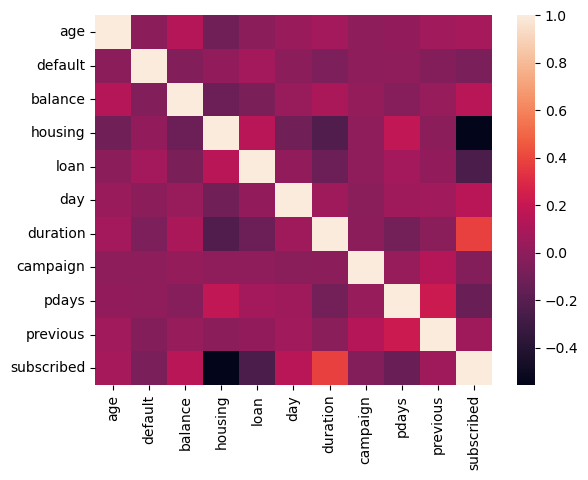

In [8]:
# create a heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(bank_df.corr())

In [9]:
# Calculate the correlation coefficients between numeric columns in the bank_df dataframe
correlation_coefficients = bank_df.corr(numeric_only=True)

# Select the last row of the correlation_coefficients dataframe, which contains the correlation values of the target variable with all other variables
target_variable_correlation = correlation_coefficients.iloc[-1]

# Sort the correlation values in descending order and assign the result to sorted_correlation
sorted_correlation = target_variable_correlation.sort_values(ascending=False)
sorted_correlation

subscribed    1.000000
duration      0.385209
day           0.153196
balance       0.150395
age           0.085983
previous      0.058678
campaign     -0.034457
default      -0.075339
pdays        -0.132887
loan         -0.247945
housing      -0.557382
Name: subscribed, dtype: float64

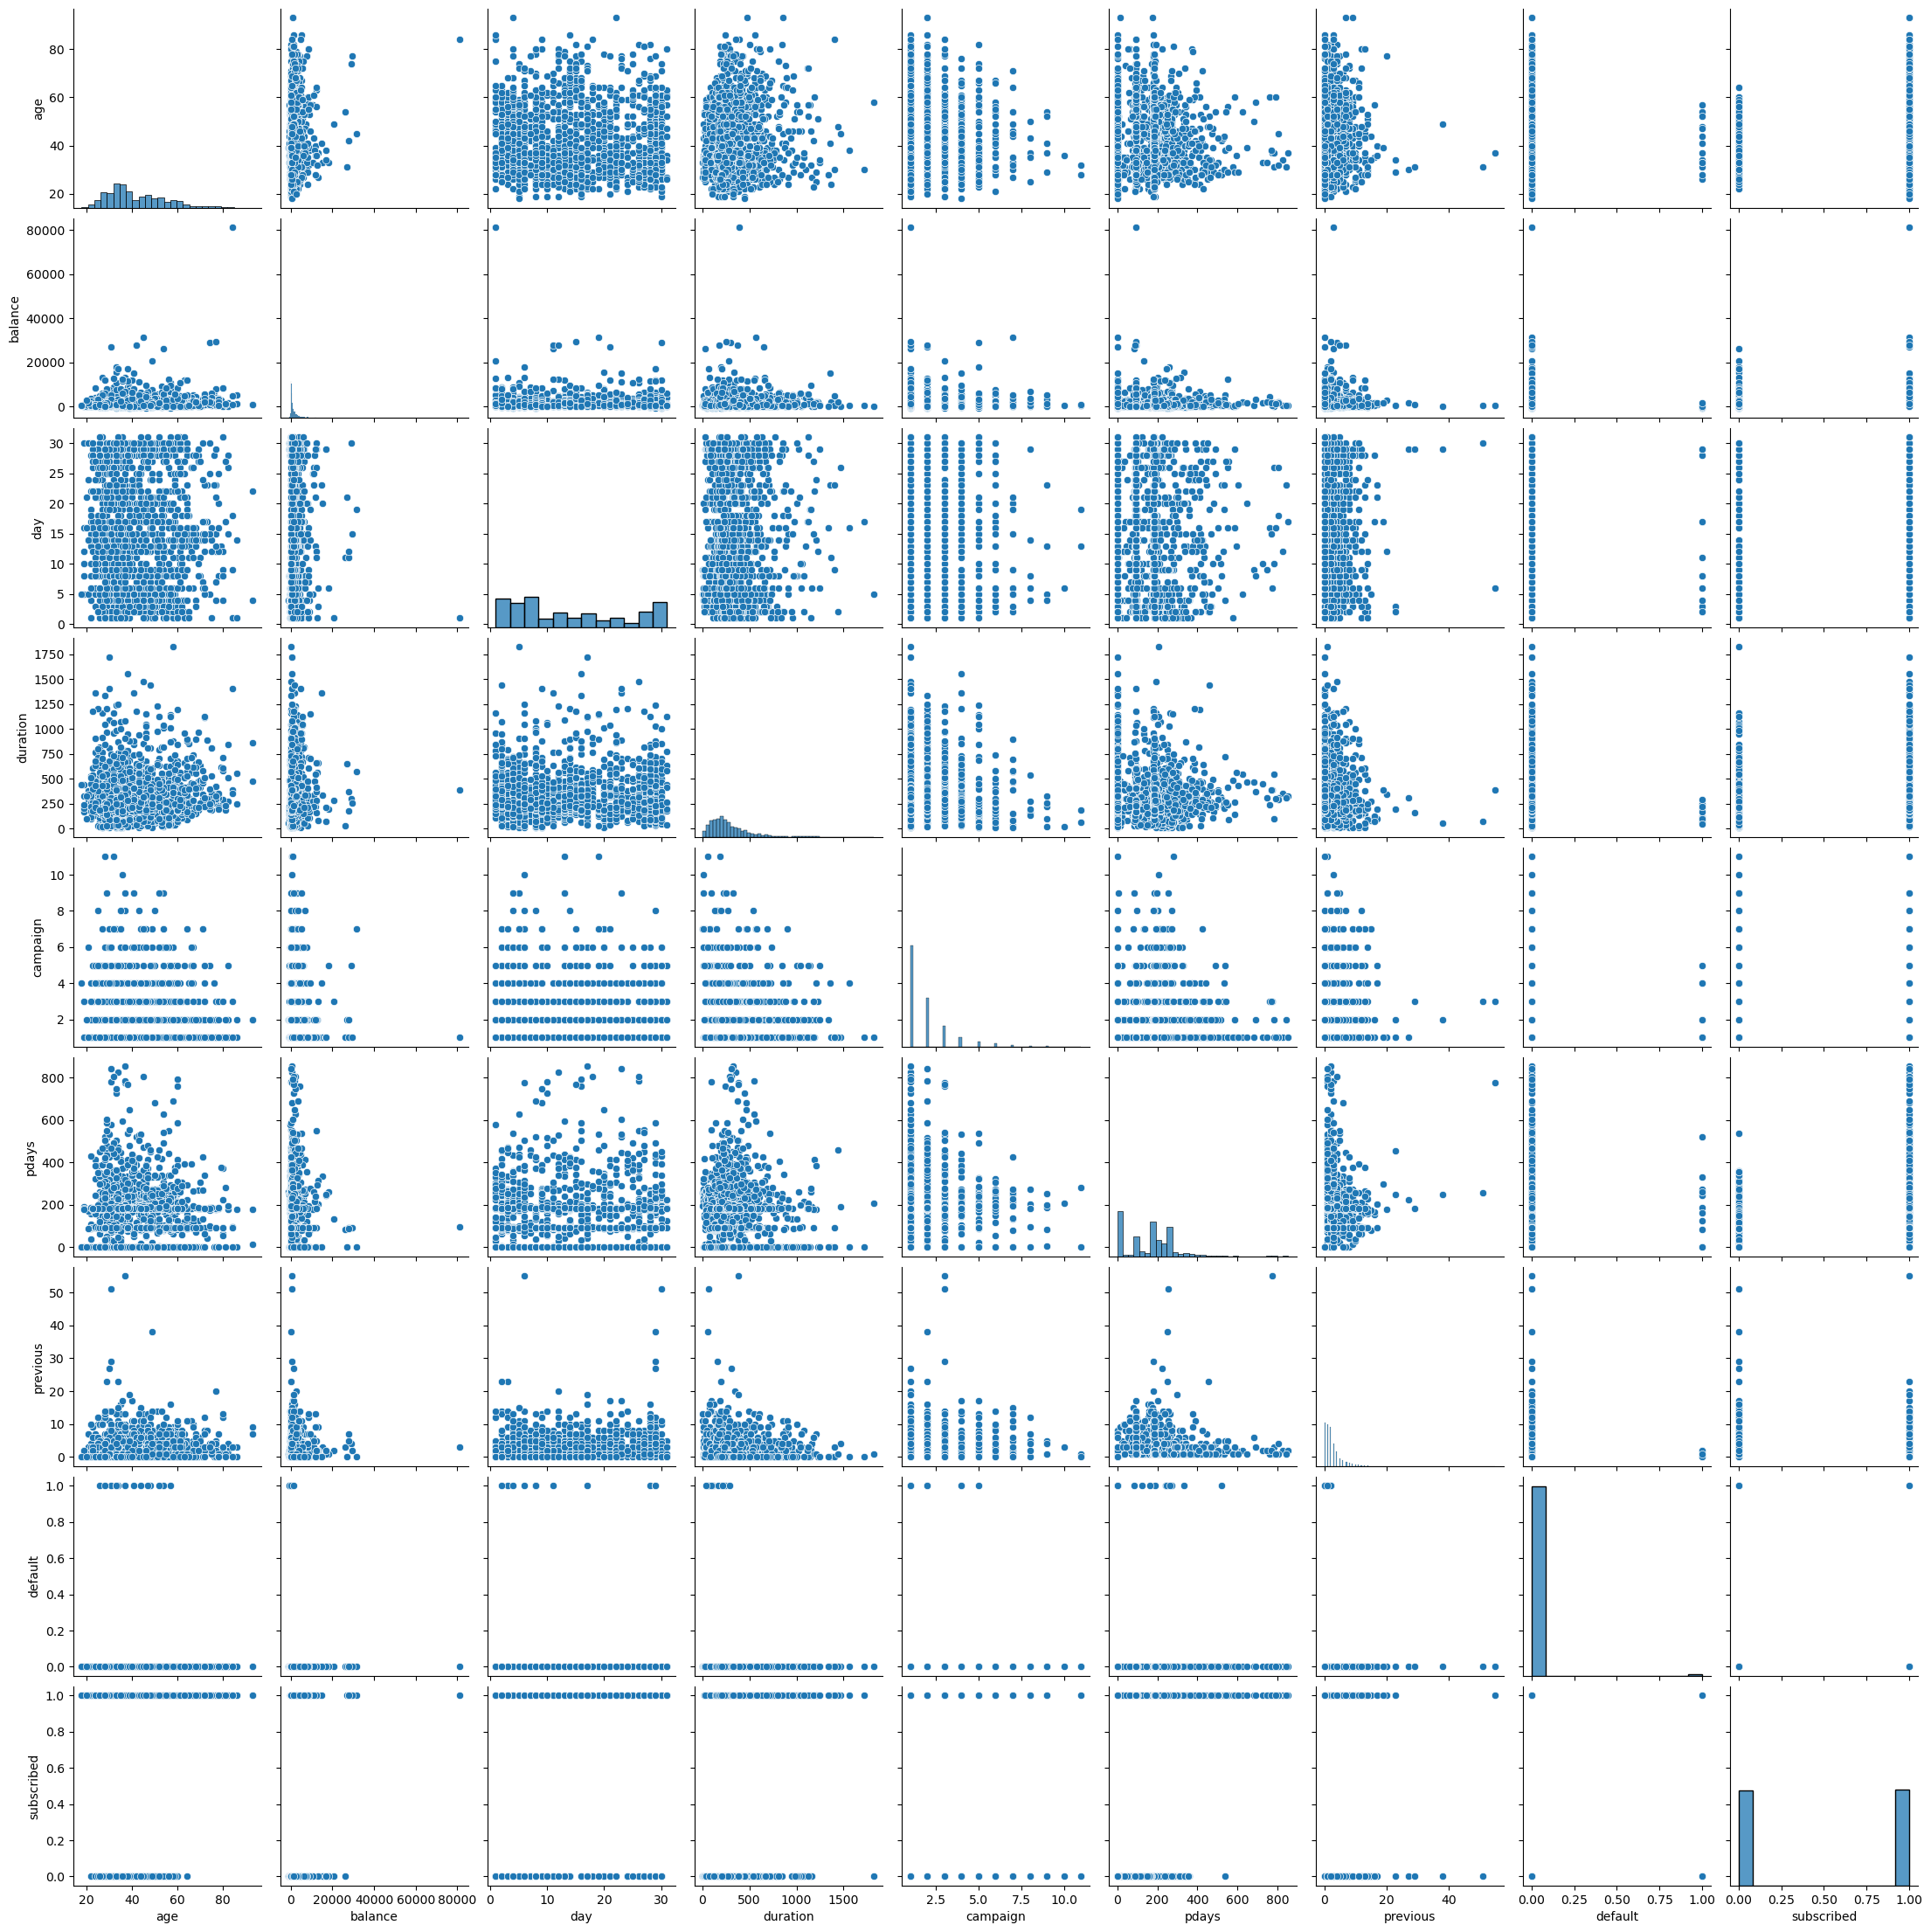

In [10]:
# Select columns from the 'bank_df' dataframe and drop any rows with missing values
selected_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'default', 'subscribed']
selected_data = bank_df[selected_columns].dropna()

# Create a pair plot using the selected data
sns.pairplot(data=selected_data)
plt.show()

## Age

The bar chart and boxplots show that the average age is around 40, with outliers above 90 and below 20. Further analysis shows the following:

-	Mean: The average age of customers who subscribed (42.8 years) is slightly higher than that of customers who did not (40.7 years). This suggests that the fixed-term deposit may be more appealing to older customers.
-	Standard deviation: The standard deviation of the age variable is higher for those who subscribed (15.4 years) than those who did not (9.2 years). This means that the age distribution of customers who subscribed is more spread out than those who did not. This may suggest that the offered fixed-term deposit has a broader appeal to diverse customers.
-	Minimum and Maximum: The minimum and maximum age for subscribed customers is 18 and 93, respectively. For those who did not subscribe, the minimum and maximum age is 22 and 64, respectively. This suggests that the fixed-term deposit appeals to customers of various ages.
-	Quartiles: The interquartile range (IQR) for customers who subscribed (23 years) is more significant than that of customers who did not (15 years). This means that the age distribution of customers who subscribed is more varied than those who did not. Additionally, the median age of customers who subscribed (38 years) is slightly lower than that of customers who did not (39 years).

From the Age data, I think that while the product appeals to customers of a wide variety of ages, it seems more appealing to older customers. However, this will need to be considered with other data.


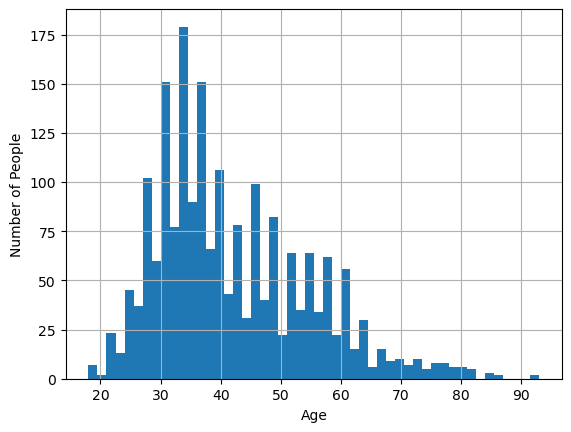

In [11]:
# Plot a histogram showing the distribution of the age of people contacted.
bank_df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

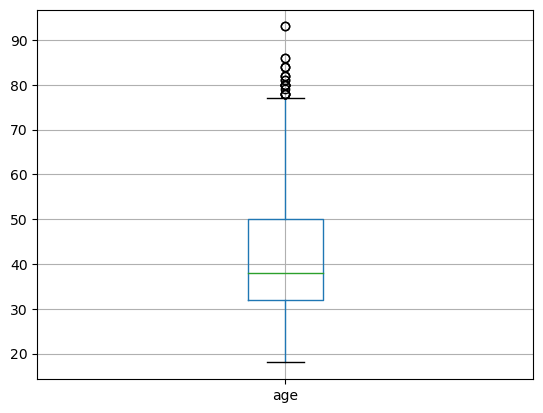

In [12]:
# Boxplot of showing the distribution of the age of people contacted. 
# We can see that the median is around 40 which lines up with what the describe function told us earlier on.
bank_df.boxplot(column='age')
plt.show()

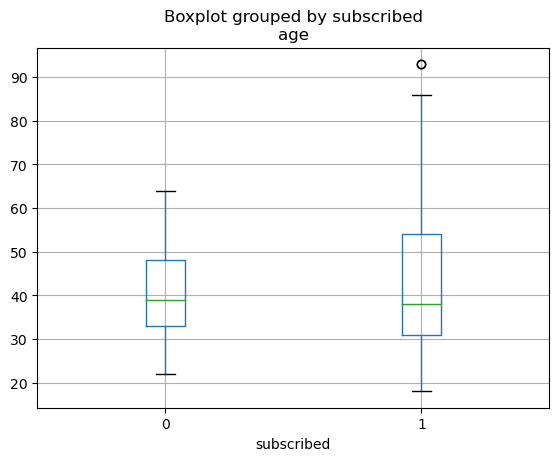

In [13]:
# Age box plot grouped by subscription
bank_df.boxplot(column='age', by='subscribed')
plt.show()

In [14]:
# Calculate summary statistics for age for those who subscribed
subscribed_df = bank_df[bank_df['subscribed'] == 1]
subscribed_stats = subscribed_df['age'].describe()

# Calculate summary statistics for age for those who did not subscribe
not_subscribed_df = bank_df[bank_df['subscribed'] == 0]
not_subscribed_stats = not_subscribed_df['age'].describe()

# Print the results
print("Summary statistics for age for those who subscribed:")
print(subscribed_stats)
print("\nSummary statistics for age for those who did not subscribe:")
print(not_subscribed_stats)

Summary statistics for age for those who subscribed:
count    997.000000
mean      42.843531
std       15.382656
min       18.000000
25%       31.000000
50%       38.000000
75%       54.000000
max       93.000000
Name: age, dtype: float64

Summary statistics for age for those who did not subscribe:
count    991.000000
mean      40.655903
std        9.192425
min       22.000000
25%       33.000000
50%       39.000000
75%       48.000000
max       64.000000
Name: age, dtype: float64


## Call Duration

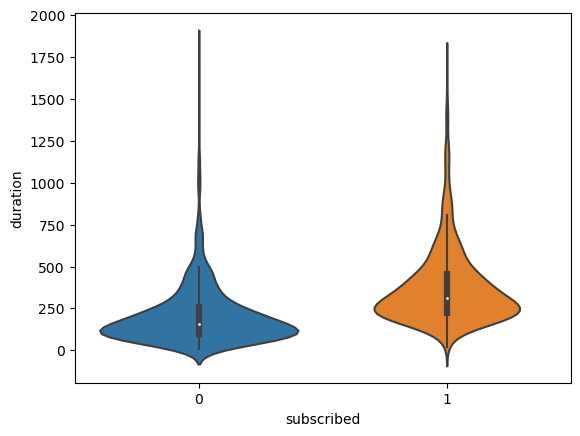

In [15]:
sns.violinplot(data=bank_df, x='subscribed', y='duration')
plt.show()

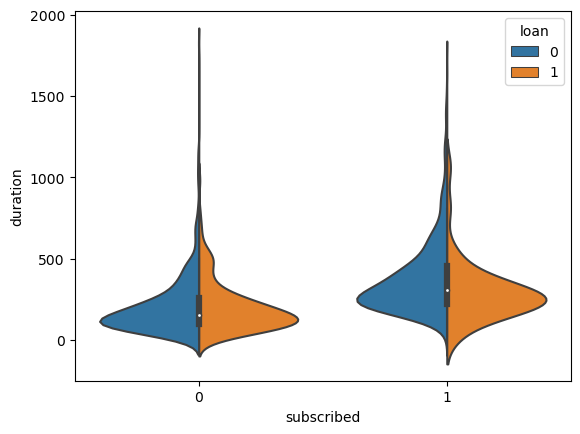

In [16]:
sns.violinplot(data=bank_df, x='subscribed', y='duration', hue='loan', split=True)
plt.show()

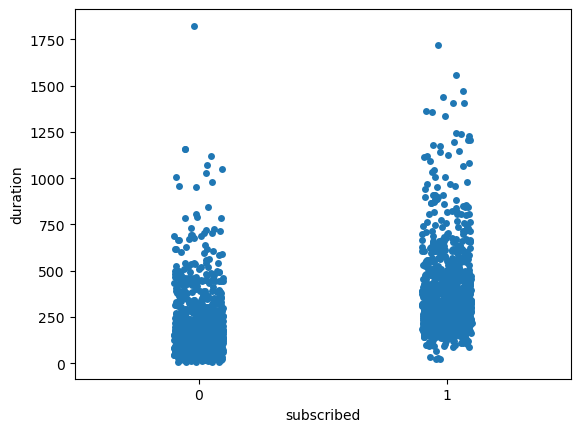

In [17]:
#Strip plot for Subscribed vs Call duration

sns.stripplot(x=bank_df['subscribed'], y=bank_df['duration'], jitter=True, orient='v')
plt.show()

## Default history

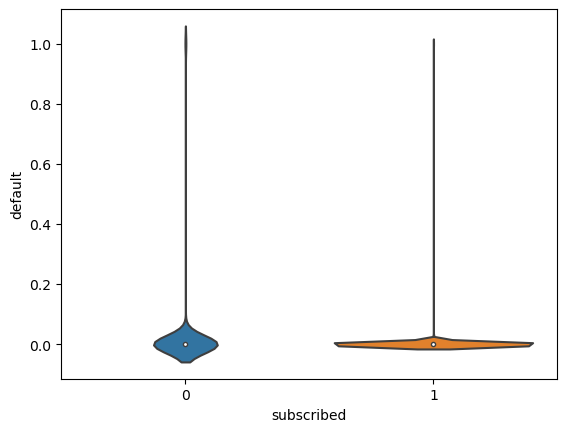

In [18]:
sns.violinplot(data=bank_df, x='subscribed', y='default')
plt.show()

In [19]:
default = bank_df[bank_df['default'] > 0]
default

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
32,34.0,blue-collar,single,secondary,1,-60,0,0,cellular,3,apr,84,1,332,1,failure,0
185,48.0,blue-collar,divorced,secondary,1,-535,1,0,cellular,2,feb,115,2,187,2,failure,0
318,54.0,retired,divorced,secondary,1,-200,0,1,cellular,4,feb,71,1,243,1,failure,0
450,57.0,admin.,divorced,secondary,1,-435,1,1,cellular,6,feb,89,5,273,2,failure,0
499,31.0,management,single,secondary,1,0,0,0,cellular,11,feb,112,4,85,2,failure,0
520,33.0,blue-collar,married,secondary,1,-354,1,1,cellular,28,jan,104,1,245,2,failure,0
597,NaN,self-employed,married,secondary,1,254,1,1,cellular,29,jan,194,1,188,1,failure,0
645,26.0,management,divorced,tertiary,1,-402,0,1,cellular,29,jan,66,2,262,2,failure,0
674,47.0,management,married,tertiary,1,-337,0,1,cellular,29,jan,243,4,161,2,failure,0
799,33.0,blue-collar,married,primary,1,-744,1,0,NaN,8,may,206,1,-1,0,NaN,0


## Balance

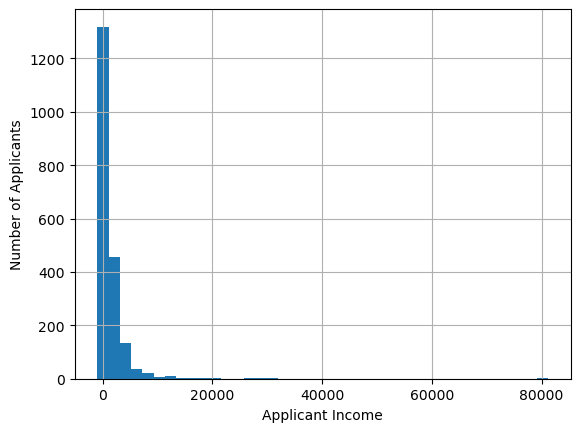

In [20]:
bank_df['balance'].hist(bins=40)
plt.xlabel('Applicant Income')
plt.ylabel('Number of Applicants')
plt.show()

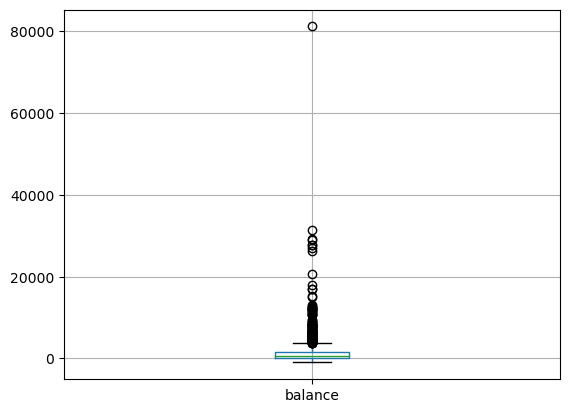

In [21]:
# Boxplot of showing the distribution of the age of people contacted. 
# We can see that the median is around 40 which lines up with what the describe function told us earlier on.
bank_df.boxplot(column='balance')
plt.show()

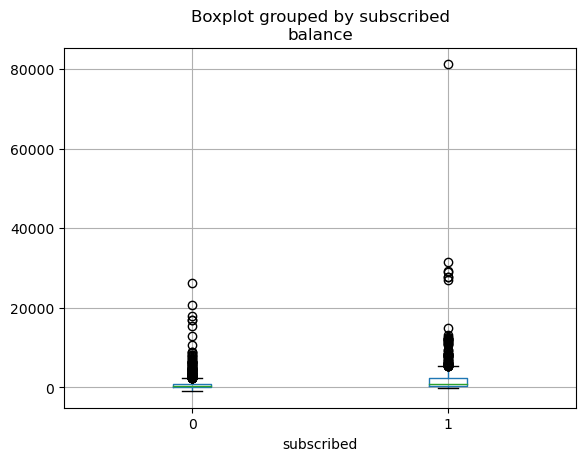

In [22]:
# Age box plot grouped by subscription
bank_df.boxplot(column='balance', by='subscribed')
plt.show()

In [23]:
def get_unique_counts(df, column1, column2):
    """
        This function takes in a DataFrame and two column names as arguments and returns a new DataFrame with the unique values in the first column along with the count of non-NA/null values in the second column for each unique value.

        :param df: The input DataFrame
        :type df: pandas.DataFrame
        :param column1: The name of the first column
        :type column1: str
        :param column2: The name of the second column
        :type column2: str
        :return: A new DataFrame with the unique values in the first column and their corresponding counts in the second column
        :rtype: pandas.DataFrame
        
    """
        
    unique_values = df[column1].unique() # Getting the unique values in the first column

    counts_subscribed = [] # Initializing an empty list to store the counts
    counts_unsubscribed = []

    for value in unique_values: # Looping through each unique value
        count_subscribed = (df[df[column1] == value][column2] == 1).sum() # Counting the number of values in column2 that are equal to 1
        counts_subscribed.append(count_subscribed) # Appending the count to the list of counts
        count_unsubscribed = (df[df[column1] == value][column2] == 0).sum() # Counting the number of values in column2 that are equal to 1
        counts_unsubscribed.append(count_unsubscribed) # Appending the count to the list of counts

    result_df = pd.DataFrame({column1: unique_values, 'Subscribed': counts_subscribed, 'Not Subscribed': counts_unsubscribed}) # Creating a new DataFrame with the unique values and their corresponding counts
    result_df = result_df.dropna(subset=[column1]) # Removing rows where the value in column1 is NaN

    # Add Subscription rate
    result_df['Subscription Rate'] = result_df['Subscribed'] / (result_df['Subscribed'] + result_df['Not Subscribed'])

    return result_df # Returning the resulting DataFrame

## Analysis by Job

-	The management job has the highest number of subscriptions, with 251, followed by technicians, with 144 subscriptions. However, technicians and managers also had many people who did not subscribe, with technicians having more people not subscribing than subscribing, 
-	On the other hand, the blue-collar job has the highest number of people who did not subscribe, with 221, with only 77 blue-collar workers subscribing. Only a 25% subscription rate.
-	The retired people have an interesting pattern where it has a high number of subscriptions with 136 but a few people who did not subscribe with only 26. A subscription rate of 83%.
-	The students have many subscriptions, with 87 and fewer people who did not subscribe, with only 9. An overall subscription rate of 90%

This shows that the fixed-term deposit appeals to retired people and students, so more focus could be put into calling these demographics. However, the lack of uptake among blue collared workers shows how the product is marketed to this group should be changed.


              job  Subscribed  Not Subscribed  Subscription Rate
0      technician         144             204           0.413793
1         retired         136              26           0.839506
2     blue-collar          77             221           0.258389
3   self-employed          35              29           0.546875
4        services          50             115           0.303030
5      management         251             210           0.544469
6          admin.         130             117           0.526316
7      unemployed          48              21           0.695652
8         student          87               9           0.906250
9    entrepreneur          15              30           0.333333
10      housemaid          20              15           0.571429


<AxesSubplot: xlabel='job'>

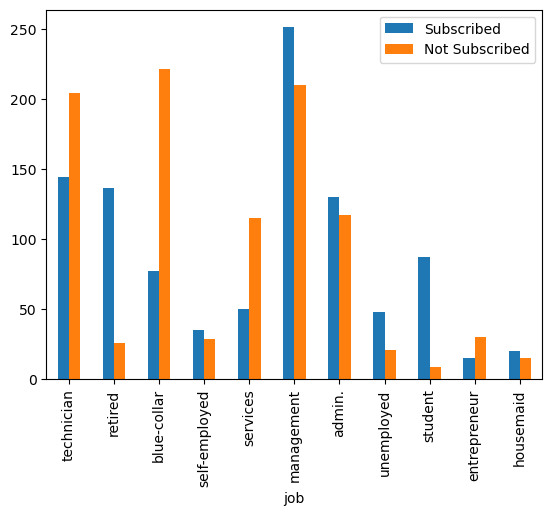

In [24]:
job_count_df = get_unique_counts(bank_df, 'job', 'subscribed')
print(job_count_df)
job_count_df.plot(x='job', y=['Subscribed', 'Not Subscribed'], kind='bar')

### Analysis by Marital Status

The data represents subscription rates to a service based on marital status. The data has three marital status categories: single, divorced, and married.

-	Single individuals have the highest subscription rate (60.09%), followed by married individuals (45.09%) and divorced individuals (43.72%).
-	The difference in subscription rates between single individuals and divorced/married individuals is quite substantial. The subscription rate for single individuals is nearly 17 percentage points higher than that of divorced individuals and about 15 percentage points higher than that of married individuals.
-	The subscription rate for divorced individuals is the lowest among the three categories.
-	The difference in subscription rates between married and divorced individuals is relatively small, with a difference of only about 0.01 percentage points.

Based on this data, single people are more likely to subscribe to a fixed-term deposit with the bank, while married and divorced people have less than a 50% chance of subscribing. Therefore, the bank should try to expand their marketing to single and research how this product could be marketed to appeal more to married and divorced people.


    marital  Subscribed  Not Subscribed  Subscription Rate
0    single         405             269           0.600890
1  divorced          94             121           0.437209
2   married         501             610           0.450945


<AxesSubplot: xlabel='marital'>

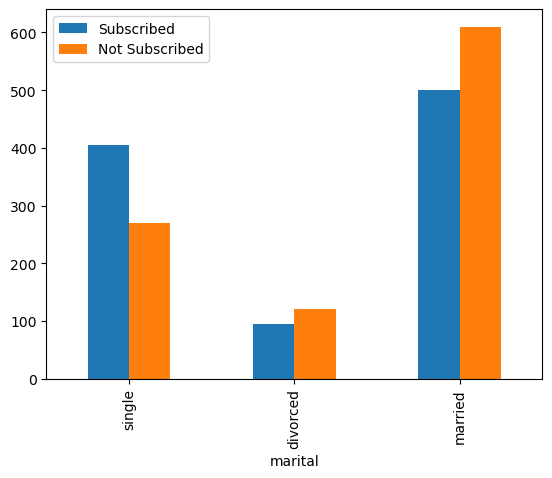

In [25]:
marital_count_df = get_unique_counts(bank_df, 'marital', 'subscribed')
print(marital_count_df)
marital_count_df.plot(x='marital', y=['Subscribed', 'Not Subscribed'], kind='bar')

   education  Subscribed  Not Subscribed  Subscription Rate
0   tertiary         396             288           0.578947
1  secondary         451             544           0.453266
3    primary          84             133           0.387097


<AxesSubplot: xlabel='education'>

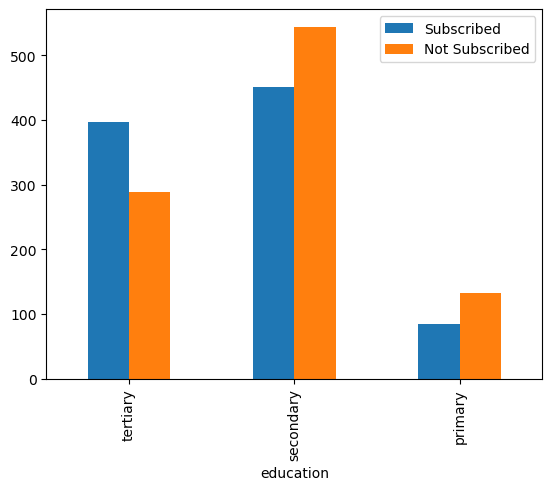

In [26]:
education_count_df = get_unique_counts(bank_df, 'education', 'subscribed')
print(education_count_df)
education_count_df.plot(x='education', y=['Subscribed', 'Not Subscribed'], kind='bar')